In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn.datasets as dataset
from sklearn.metrics import accuracy_score, confusion_matrix

def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. zadatak

Usporedite razliku između modela logističke i linearne regresije na zadanom skupu podatka. Nacrtajte decizijske granice pomoću `plot_2d_clf_problem`. Komentirajte razlike između ta dva modela (Usporedite hipoteze modela i funkciju pogreške).

Bodovi:
1. teorija /4
2. implementacija /6

In [10]:
X = np.array([
    [1,1],
    [2,2],
    [0,2],
    [1,3], 
    [3,4],
    [4,4],
    [5,4],
    [10,10]
])

y = np.array([1,1,1,1,0,0,0,0])


### Zadatak 2
Iskoristite algoritam logističke regresije za klasifikaciju znamenki. Komentirajte performansu modela (accuracy i matricu zabune). Obavezno koristite train-test split (koji je već zadan).

Bodovi:
1. komentar /2
2. implementacija /8

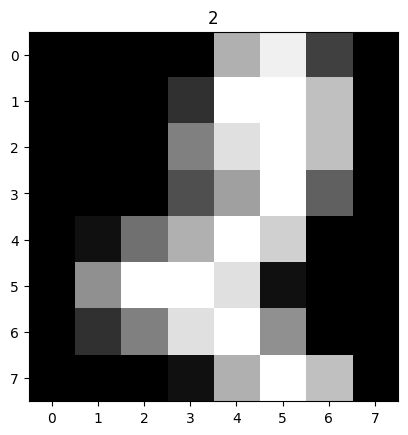

In [70]:
ds = dataset.load_digits()

X = ds['data']
y = ds['target']

index = np.random.randint(len(X))
plt.title(y[index])
plt.imshow(X[index].reshape(8,8), cmap='gray')
plt.show()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [71]:
clf = LogisticRegression(max_iter=3000)
clf.fit(x_train,y_train)

pred = clf.predict(x_test)
print(f'acc {accuracy_score(y_test, pred)}')
print(confusion_matrix(y_test, pred))


acc 0.9596662030598053
[[66  0  0  0  0  0  0  0  0  0]
 [ 0 74  0  0  0  0  0  0  1  1]
 [ 0  1 70  0  0  0  0  0  0  0]
 [ 0  0  0 74  0  5  0  0  0  2]
 [ 0  0  0  0 70  0  0  1  0  0]
 [ 0  0  1  1  1 72  0  1  0  0]
 [ 0  2  0  0  0  1 68  0  0  0]
 [ 0  0  0  0  0  0  0 77  0  1]
 [ 0  2  0  0  2  1  0  0 51  0]
 [ 1  1  0  0  0  2  0  0  1 68]]


### 3. zadatak

Probajte poboljšati performansu modela iz drugog zadatka polinomijalnim preslikavanjem drugog stupnja. Pronađite optimalnu regularizacijsku težinu $C$ (koja se zadaje kao argument konstruktora logističke regresije). Nacrtajte graf ovisnosti preciznosti o složenosti modela. 

Komentari:
1. Lista C-ova Vam je zadana unutar python ćelije
2. Stupanj polinomijalnog preslikavanja ne mijenjate
3. Složenost modela možete prikazati ili indeksom odabranog C-a ili vrijednosti C-a. U slučaju da odaberete vrijednosti, prije crtanja preporuča se pozvati funkciju `plt.xscale('log')`. Na konkretnom primjeru to će preslikati vrijednosti u [-3, -2, -1, 0, 1].
4. Dataset je ponovno učitan kako bi ste mogli zadatak pokretati nezavisno o zadatku dva i ostalim zadatcima

Bodovi:
1. Implementacija  /10

In [73]:
ds = dataset.load_digits()

X = ds['data']
y = ds['target']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

cs = [0.001, 0.01, 0.1, 1, 10] 



Na zadanom skupu podataka naučite model logističke regresije s polinomijalnim preslikavanjem. Odredite optimalni stupanj polinomijalnog preslikavanja. Obavezno koristite train i test dataset. Komentirajte kratko kako ste došli do odluke

Bodovi:
1. Implementacija /7
2. Komentar /3

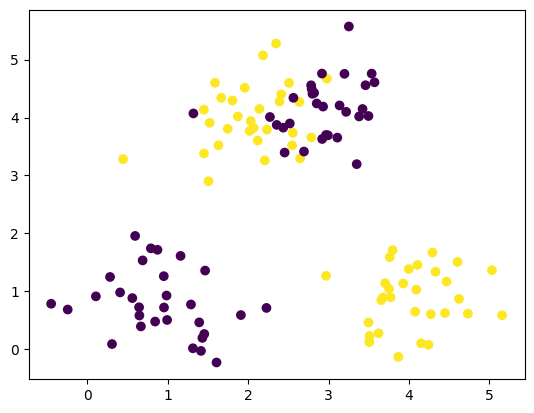

In [98]:
def make_quad(n_per_quad=10, centers=None, center_labels=None, cov_matrix=None):
    if centers is None:
        centers = np.array([
            [1,1],
            [1,4],
            [4,4],
            [4,1]
        ])

    if center_labels is None:
        center_labels = [0,1,0,1]


    if cov_matrix is None:
        cov_matrix = [[0.3, 0.0], [0.0, 0.3]]

    X, y = [], []
    for center, label in zip(centers, center_labels):
        points = np.random.multivariate_normal(mean=center,cov=cov_matrix, size=n_per_quad)
        X.append(points)
        y.extend([label] * n_per_quad)

    X = np.vstack(X)
    y = np.array(y)

    return X,y    

    
X, y = make_quad(30, centers=np.array([[1,1],[2,4],[3,4],[4,1]]))

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()